In [1]:
cd("/Users/michael/work/GitHub/epinets")

In [56]:
include("EpiSim.jl")

Main.EpiSim

In [3]:
using CSV
using Plots
using LightGraphs
using JLD2, FileIO

In [4]:
cd("/Users/michael/work/GitHub/COVID-19/csse_covid_19_data/csse_covid_19_time_series")

In [5]:
file="time_series_covid19_confirmed_global.csv"
allstates=["Australian Capital Territory" "New South Wales"  "Northern Territory" "Queensland" "South Australia" "Tasmania" "Victoria" "Western Australia"]

1×8 Array{String,2}:
 "Australian Capital Territory"  …  "Victoria"  "Western Australia"

In [6]:
z=[]
for state in allstates
    z=push!(z,EpiSim.getdata("Australia",state))
end

In [8]:
ddays=CSV.File(file)[1]
ddays=propertynames(ddays,4)[5:end]
ddays=String.(ddays)
ndays=length(ddays)

88

In [7]:
pops=[426709 8089526 245869 5095100 1751693 534281 6594804 2621680]

1×8 Array{Int64,2}:
 426709  8089526  245869  5095100  1751693  534281  6594804  2621680

In [9]:
#'reasonable' parameters
epiparam=Dict()
epiparam["p0"]=0.2 #a guess - tuned to match observed data 
epiparam["p2"]=1/12 #revised infection rate with distancing measure
epiparam["q"]=1/7 #"up to" two weeks
epiparam["r0"]=1/14 #about two weeks for mild, 3-6 for severe
epiparam["r2"]=1/4 #revised removal rate (now due to testing and isolation)
epiparam["nseeds"]=5 #probably too many, consider dropping.

5

In [12]:
plotly()

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /Users/michael/.julia/packages/Plots/cc8wh/src/backends.jl:363


Plots.PlotlyBackend()

In [16]:
cd("/Users/michael/work/GitHub/epinets")
@load "done_AU"

6-element Array{Symbol,1}:
 :allrs
 :z
 :totItps
 :tpdays
 :statename
 :epiparam

In [26]:
i=4
pop=Int(floor(sqrt(pops[i])))^2
y=z[i];
ddt(z,zt)=count(z->z>0, z[1:zt])+ count(z->z<0, z[zt+1:end])
~,tpday=findmax([ddt(diff(diff(y)),nx) for nx in 1:(ndays-2)])
#this is the turning point between exponential growth and decay. totItp total infections at day tpday
totItp=y[tpday+1]
plot(1:tpday+1,y[1:tpday+1],lw=4,label="growth phase",title=allstates[i])
plot!(tpday+1:ndays,y[tpday+1:ndays],lw=4,label="plateau")

<!DOCTYPE html>
 
 
 Plots.jl

In [55]:
i=1
pop=Int(floor(sqrt(pops[i])))^2
y=z[i];
statename=allstates[i]
plot(ddays,y,size=(1200,600),label=false)
EpiSim.plotquantiles(pop .- (allrs[statename][1,2]+allrs[statename][1,1]),:blue,"90% Compliance")
EpiSim.plotquantiles(pop .- (allrs[statename][2,2]+allrs[statename][2,1]),:green,"95% Compliance")
EpiSim.plotquantiles(pop .- (allrs[statename][3,2]+allrs[statename][3,1]),:purple,"80% Compliance")
plot!(1:tpdays[statename]+1,y[1:tpdays[statename]+1],lw=4, color=:red,label="growth phase",title=allstates[i])
plot!(tpdays[statename]+1:ndays,y[tpdays[statename]+1:ndays],color=:yellow,lw=4,label="plateau",xlim=(0, 120), ylim=(0,2*y[end]))

<!DOCTYPE html>
 
 
 Plots.jl

In [68]:
plt=Array{Any,1}(undef,length(allstates))
for i in 1:length(allstates)
    pop=Int(floor(sqrt(pops[i])))^2
    y=z[i];
    statename=allstates[i]
    plt[i]=plot(ddays,y,size=(1200,600),label=false)
    EpiSim.plotquantilesnk(pop .- (allrs[statename][1,2]+allrs[statename][1,1]),:blue)
    EpiSim.plotquantilesnk(pop .- (allrs[statename][2,2]+allrs[statename][2,1]),:green)
    EpiSim.plotquantilesnk(pop .- (allrs[statename][3,2]+allrs[statename][3,1]),:purple)
    plot!(1:tpdays[statename]+1,y[1:tpdays[statename]+1],lw=4, color=:red,label=false,title=allstates[i])
    plot!(tpdays[statename]+1:ndays,y[tpdays[statename]+1:ndays],color=:yellow,lw=4,label=false,xlim=(0, 120), ylim=(0,2*y[end]))
end

In [24]:
epiparam["pop"]
pops[i]

5095100

In [58]:
plot(plt[1],plt[2],plt[3],plt[4],plt[5],plt[6],plt[7],plt[8],layout=(4,2),size=(1000,1200))

<!DOCTYPE html>
 
 
 Plots.jl

In [66]:
gr()

Plots.GRBackend()

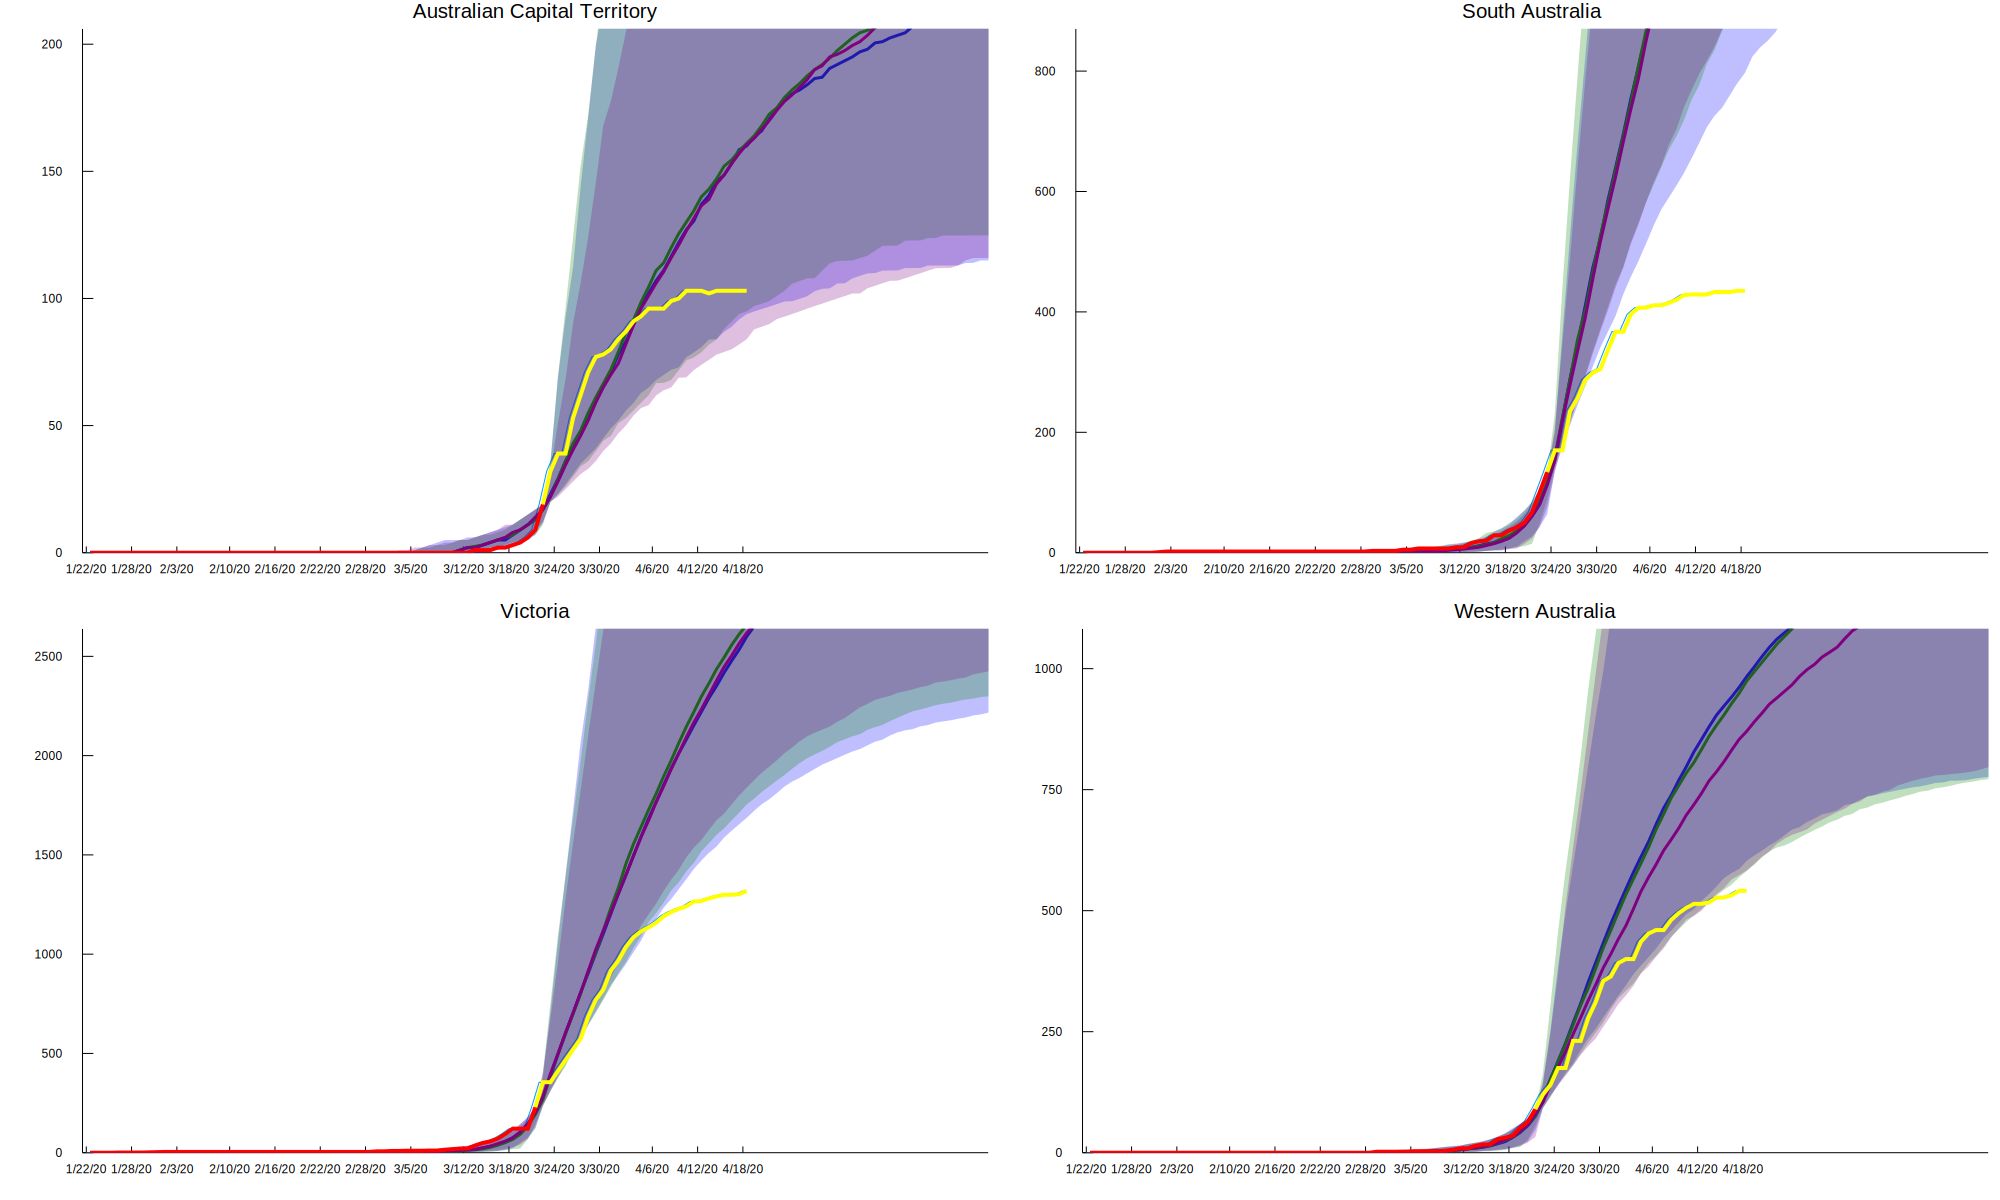

In [71]:
plot(plt[1],plt[5],plt[7],plt[8],layout=(2,2),size=(2000,1200))

In [73]:
pwd()

"/Users/michael/work/GitHub/epinets"

In [75]:
savefig("figure5a")

In [98]:
pops=[7451000 5639000 5518000 5806000 24280000 21540000 60360000 80300000]
allstates=["Hong Kong" "" "" "" "Shanghai" "Beijing" "" "" ]
countries=["China" "Singapore" "Finland" "Denmark" "China" "China" "Italy" "Germany"]
@load("Done_-Singapore")

9-element Array{Symbol,1}:
 :allrs
 :rs
 :z
 :totItps
 :tpdays
 :allstates
 :countries
 :epiparam
 :i

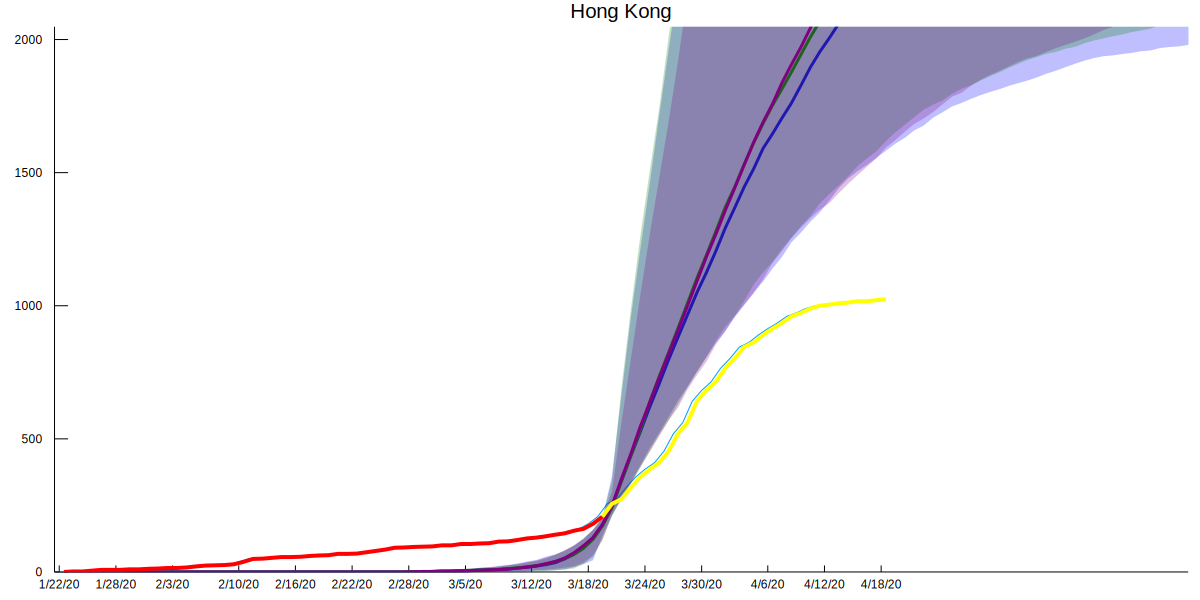

In [100]:
usename=["Hong Kong" "Singapore" "Finland" "Denmark"]
plt=Array{Any,1}(undef,4)
i=1
    pop=Int(floor(sqrt(pops[i])))^2
    y=z[i];
    statename=allstates[i]
    plt[i]=plot(ddays,y,size=(1200,600),label=false)
    EpiSim.plotquantilesnk(pop .- (allrs[allstates[i]][1,2]+allrs[allstates[i]][1,1]),:blue)
    EpiSim.plotquantilesnk(pop .- (allrs[allstates[i]][2,2]+allrs[allstates[i]][2,1]),:green)
    EpiSim.plotquantilesnk(pop .- (allrs[allstates[i]][3,2]+allrs[allstates[i]][3,1]),:purple)
    plot!(1:tpdays[allstates[i]]+1,y[1:tpdays[allstates[i]]+1],lw=4, color=:red,label=false,title=usename[i])
    plot!(tpdays[allstates[i]]+1:ndays,y[tpdays[allstates[i]]+1:ndays],color=:yellow,lw=4,label=false,xlim=(0, 120), ylim=(0,2*y[end]))


In [93]:
    filetitle="Done_"*join(split(allstates[i]))*"-"*join(split(countries[i]))

@load(filetitle)

LoadError: MethodError: no method matching jldopen(::Symbol)
Closest candidates are:
  jldopen(!Matched::AbstractString) at /Users/michael/.julia/packages/JLD2/hB4ya/src/JLD2.jl:288
  jldopen(!Matched::AbstractString, !Matched::Bool, !Matched::Bool, !Matched::Bool) at /Users/michael/.julia/packages/JLD2/hB4ya/src/JLD2.jl:203
  jldopen(!Matched::AbstractString, !Matched::Bool, !Matched::Bool, !Matched::Bool, !Matched::T; compress, mmaparrays) where T<:Union{Type{IOStream}, Type{JLD2.MmapIO}} at /Users/michael/.julia/packages/JLD2/hB4ya/src/JLD2.jl:203
  ...

In [83]:
ttpdays=Array{Any,1}[undef,4]
tallrs=Array{Any,1}[undef,4]
for i=1:4
    @load("Done_-"*countries[i])
    ttpdays[i]=deepcopy(tpdays[allstates[i]])
    tallrs[i]=deepcopy(allrs[allstates[i]])
end

MethodError: MethodError: Cannot `convert` an object of type UndefInitializer to an object of type Array{Any,1}
Closest candidates are:
  convert(::Type{Array{T,N}}, !Matched::StaticArrays.SizedArray{S,T,N,M} where M) where {T, S, N} at /Users/michael/.julia/packages/StaticArrays/1g9bq/src/SizedArray.jl:72
  convert(::Type{Array{S,N}}, !Matched::PooledArrays.PooledArray{T,R,N,RA} where RA) where {S, T, R, N} at /Users/michael/.julia/packages/PooledArrays/yiLq3/src/PooledArrays.jl:294
  convert(::Type{T}, !Matched::AbstractArray) where T<:Array at array.jl:533
  ...

In [81]:
tpdays[allstates[i]]

57

In [82]:
allrs[allstates[i]]

3×4 Array{Any,2}:
 UInt64[0x0000000000588d11 0x0000000000588d11 … 0x0000000000588d11 0x0000000000588d11; 0x0000000000588d11 0x0000000000588d11 … 0x0000000000588d11 0x0000000000588d11; … ; 0x00000000005844c9 0x00000000005841ea … 0x0000000000584c81 0x000000000058418d; 0x00000000005844c0 0x00000000005841e8 … 0x0000000000584c7b 0x0000000000584188]  …  UInt64[0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; 0x0000000000000000 0x0000000000000000 … 0x0000000000000000 0x0000000000000000; … ; 0x00000000000047c7 0x0000000000004ab4 … 0x0000000000004035 0x0000000000004b22; 0x00000000000047da 0x0000000000004ac2 … 0x0000000000004043 0x0000000000004b2c]
 UInt64[0x0000000000588d11 0x0000000000588d11 … 0x0000000000588d11 0x0000000000588d11; 0x0000000000588d11 0x0000000000588d11 … 0x0000000000588d11 0x0000000000588d11; … ; 0x00000000005847e5 0x000000000058337f … 0x000000000058576b 0x0000000000583215; 0x00000000005847df 0x0000000000583373 … 0x0000000000585764 0x0000000000583